In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [2]:
data_order = pd.read_csv("datathon_order.csv")
data_picking = pd.read_csv("datathon_picking.csv")

C:\Users\Salih\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Salih\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,5,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_picking.isna().sum()

Unnamed: 0                     0
Siparis No                     0
Siparis Tipi               27970
Urun Kodu                      0
Toplanan Miktar                0
Toplama Tarihi                 0
Toplama Saati                  0
Siparişin Düştüğü Tarih        0
Sevkiyat Tarihi                0
Müşteri                        5
Operasyon Numarası             0
dtype: int64

#### Customer-based Segmentation using feature engineering

In [4]:
data_cust = pd.DataFrame()

In [5]:
# For each customer, monthly average number of unique products is calculated. 
data_cust["prod_month_avg"] = data_order.groupby(['Müşteri No'])['Malzeme Numarası'].nunique()/12

In [6]:
# For each customer, monthly average number of total orders is calculated. 
data_cust["order_month_avg"] = data_order.groupby(['Müşteri No'])['Sipariş Numarası'].count()/12

In [7]:
# For each customer, monthly average number of total order amounts is calculated. 
data_cust["order_amount_sum"] = data_order.groupby(['Müşteri No'])['Sipariş Edilen Miktar'].sum()/12

In [8]:
data_cust = data_cust.reset_index()

In [9]:
data_cust

,Müşteri No,prod_month_avg,order_month_avg,order_amount_sum
0,C-10001,18.000000,1430.083333,10524.166667
1,C-10003,14.666667,305.250000,2484.583333
2,C-10004,1.500000,25.000000,1269.833333
3,C-10005,13.333333,117.750000,73408.583333
4,C-10006,14.166667,213.000000,972.750000
...,...,...,...,...
666,M10384,3.083333,29.500000,1746.750000
667,M10385,0.500000,0.833333,341.333333
668,M10386,14.916667,88.083333,2809.416667
669,M10387,16.916667,288.833333,22097.750000


In [10]:
data_order["Sipariş Tarihi"] = pd.to_datetime(data_order["Sipariş Tarihi"])

In [11]:
data_order["order_month"] = data_order["Sipariş Tarihi"].dt.month

In [12]:
aa = data_order.groupby(['Müşteri No',"order_month"])['Sipariş Edilen Miktar'].sum()

In [13]:
aa = pd.DataFrame(aa).reset_index()

In [14]:
b = pd.DataFrame()
b["order_std_monthly"] = aa.groupby(['Müşteri No'])['Sipariş Edilen Miktar'].std()
b=b.reset_index()

In [15]:
data_cust2 = pd.merge(data_cust, b, on="Müşteri No")

In [16]:
data_cust2['order_std_monthly'] = data_cust2['order_std_monthly'].fillna((data_cust2['order_std_monthly'].mean()))

In [17]:
data_cust2

,Müşteri No,prod_month_avg,order_month_avg,order_amount_sum,order_std_monthly
0,C-10001,18.000000,1430.083333,10524.166667,3081.735398
1,C-10003,14.666667,305.250000,2484.583333,1290.086569
2,C-10004,1.500000,25.000000,1269.833333,740.402941
3,C-10005,13.333333,117.750000,73408.583333,73880.144623
4,C-10006,14.166667,213.000000,972.750000,352.988057
...,...,...,...,...,...
666,M10384,3.083333,29.500000,1746.750000,1096.806780
667,M10385,0.500000,0.833333,341.333333,1327.166536
668,M10386,14.916667,88.083333,2809.416667,2900.352595
669,M10387,16.916667,288.833333,22097.750000,10801.190289


In [18]:
data_cust3 = data_cust2[["prod_month_avg","order_month_avg","order_amount_sum","order_std_monthly"]]

In [19]:
data_cust3

,prod_month_avg,order_month_avg,order_amount_sum,order_std_monthly
0,18.000000,1430.083333,10524.166667,3081.735398
1,14.666667,305.250000,2484.583333,1290.086569
2,1.500000,25.000000,1269.833333,740.402941
3,13.333333,117.750000,73408.583333,73880.144623
4,14.166667,213.000000,972.750000,352.988057
...,...,...,...,...
666,3.083333,29.500000,1746.750000,1096.806780
667,0.500000,0.833333,341.333333,1327.166536
668,14.916667,88.083333,2809.416667,2900.352595
669,16.916667,288.833333,22097.750000,10801.190289


In [20]:
scaler = StandardScaler()
data_cust4 = scaler.fit_transform(data_cust3)

In [21]:
data_cust4 = pd.DataFrame(data_cust4, columns=["prod_month_avg","order_month_avg","order_amount_sum","order_std_monthly"])
data_cust4

,prod_month_avg,order_month_avg,order_amount_sum,order_std_monthly
0,2.273117,9.788629,1.970678,5.110450e-01
1,1.667512,1.733985,0.141878,-1.080011e-02
2,-0.724628,-0.272814,-0.134447,-1.709039e-01
3,1.425270,0.391346,16.275278,2.113217e+01
4,1.576671,1.073406,-0.202026,-2.837444e-01
...,...,...,...,...
666,-0.436965,-0.240590,-0.025961,-6.709581e-02
667,-0.906309,-0.445865,-0.345657,-6.622606e-17
668,1.712932,0.178910,0.215769,4.582145e-01
669,2.076295,1.616430,4.603373,2.759454e+00


### Visualising Clusters by applying PCA

#### By using new features found above, customer based segmentation is done. Customers are clustered in three categories.

C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


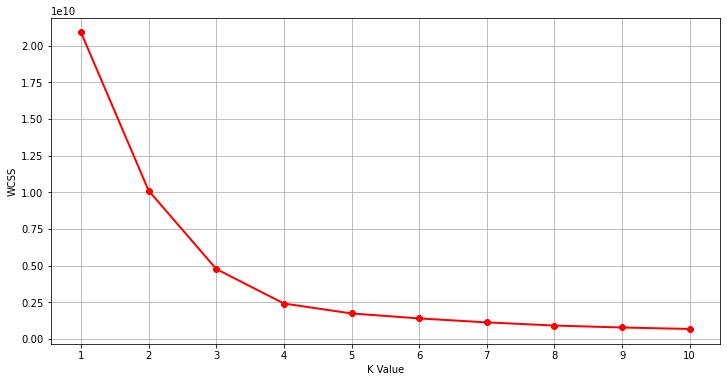

In [22]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_cust3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [23]:
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_cust4)

KMeans(n_clusters=3)

In [24]:
data_cust4["category"] = kmeans.labels_

In [25]:
X = data_cust4.drop(columns=['category'])
p = 4 # number of principle components to keep 
pca = PCA(p) 
Y = pca.fit_transform(X) ## pca is applied
print('pca.components: \n', pca.components_)
print('pca.explained variance:\n', pca.explained_variance_)
print('pca.explained variance ratio:\n', pca.explained_variance_ratio_)
X_reconstructed = pca.inverse_transform(Y)
X_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)
print('mse:')
display(((X-X_reconstructed)*(X-X_reconstructed)).mean())

pca.components: 
 [[ 0.45308972  0.39979241  0.59197261  0.53333307]
 [-0.48911267 -0.62183227  0.33085987  0.51441731]
 [-0.74027494  0.66666109  0.05817265  0.06459061]
 [-0.0864379  -0.09515068  0.73260912 -0.66840012]]
pca.explained variance:
 [2.34165098 1.06154363 0.48528971 0.11748582]
pca.explained variance ratio:
 [0.5845403  0.2649904  0.12114162 0.02932768]
mse:


prod_month_avg       6.958441e-31
order_month_avg      2.943243e-31
order_amount_sum     7.374339e-31
order_std_monthly    1.457823e-30
dtype: float64

<AxesSubplot:xlabel='Principal Components', ylabel='Explained Variance Ratios'>

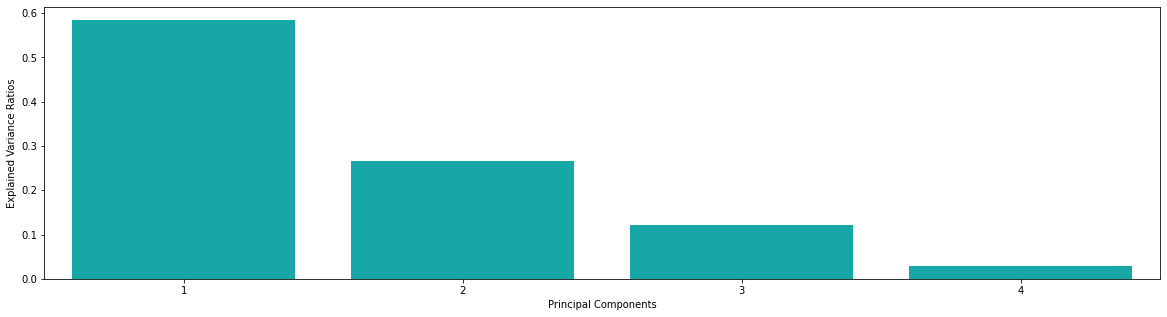

In [26]:
PClist= []
for i in range(1,5):
    PClist.append(str(i))

df11 = pd.DataFrame({'Explained Variance Ratios':pca.explained_variance_ratio_,
             'Principal Components':PClist})
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Principal Components',y="Explained Variance Ratios", 
           data=df11, color="c", ax = ax)

In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
finalDf = pd.concat([principalDf, data_cust4[['category']]], axis = 1)

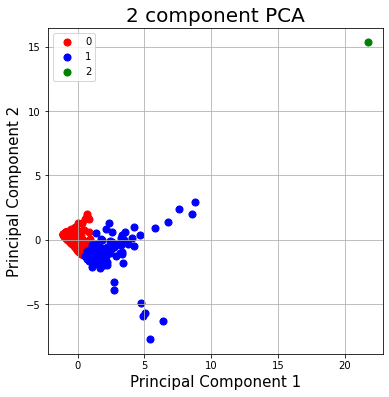

In [29]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'b', "g"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Product-based Segmentation using feature engineering

In [30]:
data_prod = pd.DataFrame()
data_prod["cust_month_avg"] = data_order.groupby(['Malzeme Numarası'])['Müşteri No'].nunique()/12
data_prod["order_month_avg"] = data_order.groupby(['Malzeme Numarası'])['Sipariş Numarası'].count()/12
data_prod["order_amount_avg"] = data_order.groupby(['Malzeme Numarası'])['Sipariş Edilen Miktar'].sum()/12
data_prod = data_prod.reset_index()

In [31]:
data_order["Sipariş Tarihi"] = pd.to_datetime(data_order["Sipariş Tarihi"])
data_order["order_month"] = data_order["Sipariş Tarihi"].dt.month
aa = data_order.groupby(['Malzeme Numarası',"order_month"])['Sipariş Edilen Miktar'].sum()
aa = pd.DataFrame(aa).reset_index()
b = pd.DataFrame()
b["order_std_monthly"] = aa.groupby(['Malzeme Numarası'])['Sipariş Edilen Miktar'].std()
b=b.reset_index()
data_prod2 = pd.merge(data_prod, b, on='Malzeme Numarası')
data_prod2['order_std_monthly'] = data_prod2['order_std_monthly'].fillna((data_prod2['order_std_monthly'].mean()))
data_prod3 = data_prod2[["cust_month_avg","order_month_avg","order_amount_avg","order_std_monthly"]]

In [32]:
scaler = StandardScaler()
data_prod4 = scaler.fit_transform(data_prod3)
data_prod4 = pd.DataFrame(data_prod4, columns=["cust_month_avg","order_month_avg","order_amount_avg","order_std_monthly"])

### Visualising Clusters by applying PCA

#### By using new features found above, product based segmentation is done. Products are clustered in three categories.

C:\Users\Salih\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


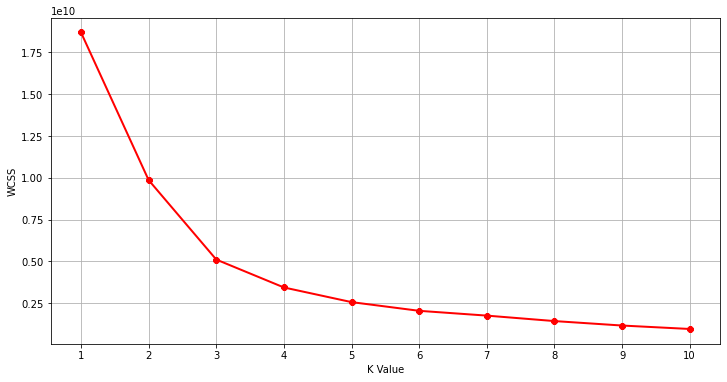

In [33]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_prod3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [34]:
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_prod4)

KMeans(n_clusters=3)

In [35]:
data_prod4["category"] = kmeans.labels_

In [36]:
X = data_prod4.drop(columns=['category'])
p = 4 # number of principle components to keep 
pca = PCA(p) 
Y = pca.fit_transform(X) ## pca is applied
print('pca.components: \n', pca.components_)
print('pca.explained variance:\n', pca.explained_variance_)
print('pca.explained variance ratio:\n', pca.explained_variance_ratio_)
X_reconstructed = pca.inverse_transform(Y)
X_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)
print('mse:')
display(((X-X_reconstructed)*(X-X_reconstructed)).mean())

pca.components: 
 [[ 0.51273024  0.5511187   0.5687507   0.33150946]
 [-0.38145259 -0.38677891  0.25183286  0.80092209]
 [-0.71740906  0.34715893  0.50419049 -0.33256109]
 [-0.27735512  0.65280237 -0.59907829  0.37152173]]
pca.explained variance:
 [2.43512931 1.04777033 0.38480155 0.13726159]
pca.explained variance ratio:
 [0.60802795 0.261618   0.09608118 0.03427287]
mse:


cust_month_avg       2.520467e-31
order_month_avg      8.186812e-31
order_amount_avg     7.132729e-31
order_std_monthly    4.664993e-31
dtype: float64

<AxesSubplot:xlabel='Principal Components', ylabel='Explained Variance Ratios'>

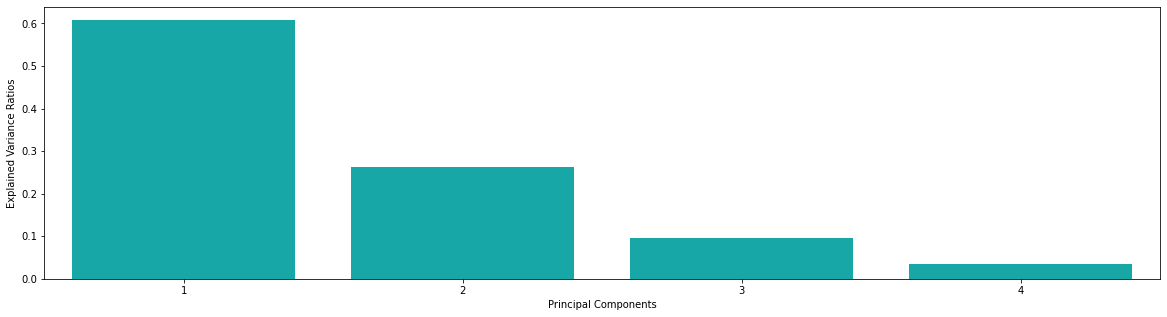

In [37]:
PClist= []
for i in range(1,5):
    PClist.append(str(i))

df11 = pd.DataFrame({'Explained Variance Ratios':pca.explained_variance_ratio_,
             'Principal Components':PClist})
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Principal Components',y="Explained Variance Ratios", 
           data=df11, color="c", ax = ax)

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data_prod4[['category']]], axis = 1)

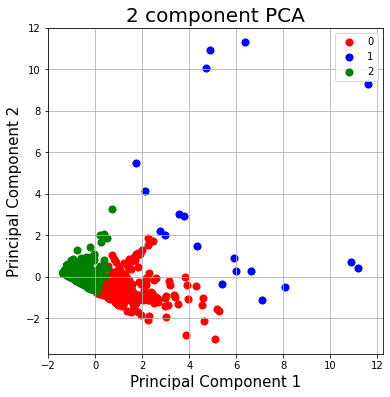

In [39]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'b', "g"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### ABC Analysis(Using only Sipariş Edilen Miktar)

In [40]:
df_1 = data_order.groupby(['Müşteri No'])['Sipariş Edilen Miktar'].sum()
df_2 = data_order.groupby(['Malzeme Numarası'])['Sipariş Edilen Miktar'].sum()
df_2 = pd.DataFrame(df_2).reset_index()

#### Product-based ABC Analysis

In [41]:
# Create bins function
def bins(x):
    for bar in range(1000, 370000, 1000):
        if x <= bar:
            return bar
# Create new column to apply the bin function
df_2["miktar_dist"] = df_2["Sipariş Edilen Miktar"].apply(lambda x: bins(x))

In [42]:
# Create a support column of 1’s to facilitate the pivot table
df_2["count"] = 1
# Create a pivot table of the revenue distributions
pivot_table = pd.pivot_table(df_2, index = ["miktar_dist"], values = ["count"], aggfunc = np.sum)

In [43]:
# import model from SKLearn
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(pivot_table)

KMeans(n_clusters=3)

In [44]:
pivot_table["category"] = kmeans.labels_

In [45]:
# Create a dictionary to give alphabetical labels
ABC_dict = {    
    0: "A",
    1: "C",
    2: "B"
}
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

In [46]:
# Merge the dataframes so that there's a new column to identify ABC
data_order_2 = pd.merge(df_2, pivot_table, on = "miktar_dist", how ="left")

In [47]:
data_order_2

,Malzeme Numarası,Sipariş Edilen Miktar,miktar_dist,count_x,count_y,category,ABC
0,12574,4989,5000,1,33,2,B
1,91704,28919,29000,1,2,0,A
2,91708,10303,11000,1,27,2,B
3,92291,23699,24000,1,8,0,A
4,92741,10144,11000,1,27,2,B
...,...,...,...,...,...,...,...
802,VN00721A,10,1000,1,178,1,C
803,VN00722A,46400,47000,1,3,0,A
804,VN01037A,3470,4000,1,36,2,B
805,VN01054A,7183,8000,1,22,2,B


In [48]:
data_order_2["ABC"].value_counts()

B    367
A    262
C    178
Name: ABC, dtype: int64

In [49]:
data_order_2[data_order_2["ABC"]=="A"]["Sipariş Edilen Miktar"].sum()

12971069

In [50]:
data_order_2[data_order_2["ABC"]=="B"]["Sipariş Edilen Miktar"].sum()

1954449

In [51]:
data_order_2[data_order_2["ABC"]=="C"]["Sipariş Edilen Miktar"].sum()

58254

In [52]:
seg_A = (262/(367+262+178))*100
seg_A_total = (12971069/(12971069+1954449+58254))*100
print("{:.2f} percent of the products (Segment A) form {:.2f} percent of all order amounts".format(seg_A,seg_A_total))

32.47 percent of the products (Segment A) form 86.57 percent of all order amounts


In [53]:
seg_B = (367/(367+262+178))*100
seg_B_total = (1954449/(12971069+1954449+58254))*100
print("{:.2f} percent of the products (Segment B) form {:.2f} percent of all order amounts".format(seg_B,seg_B_total))

45.48 percent of the products (Segment B) form 13.04 percent of all order amounts


In [54]:
seg_C = (178/(367+262+178))*100
seg_C_total = (58254/(12971069+1954449+58254))*100
print("{:.2f} percent of the products (Segment C) form {:.2f} percent of all order amounts".format(seg_C,seg_C_total))

22.06 percent of the products (Segment C) form 0.39 percent of all order amounts


#### Customer-based ABC Analysis

In [55]:
df_1 = pd.DataFrame(df_1).reset_index()

In [56]:
# Create bins function
def bins(x):
    for bar in range(10000, 950000, 20000):
        if x <= bar:
            return bar
# Create new column to apply the bin function
df_1["miktar_dist"] = df_1["Sipariş Edilen Miktar"].apply(lambda x: bins(x))

In [57]:
# Create a support column of 1’s to facilitate the pivot table
df_1["count"] = 1
# Create a pivot table of the revenue distributions
pivot_table2 = pd.pivot_table(df_1, index = ["miktar_dist"], values = ["count"], aggfunc = np.sum)

In [58]:
# import model from SKLearn
from sklearn.cluster import KMeans
# K -clusters is equal to 3 because things will be sorted into A, B, and C
kmeans = KMeans(n_clusters=3)
kmeans.fit(pivot_table2)

KMeans(n_clusters=3)

In [59]:
pivot_table2["category"] = kmeans.labels_

In [60]:
# Create a dictionary to give alphabetical labels
ABC_dict = {    
    0: "A",
    1: "B",
    2: "C"
}
pivot_table2["ABC"] = pivot_table2["category"].apply(lambda x: ABC_dict[x])

In [61]:
data_order_3 = pd.merge(df_1, pivot_table2, on = "miktar_dist", how ="left")

In [62]:
df_1

,Müşteri No,Sipariş Edilen Miktar,miktar_dist,count
0,C-10001,126290,130000,1
1,C-10003,29815,30000,1
2,C-10004,15238,30000,1
3,C-10005,880903,890000,1
4,C-10006,11673,30000,1
...,...,...,...,...
666,M10384,20961,30000,1
667,M10385,4096,10000,1
668,M10386,33713,50000,1
669,M10387,265173,270000,1


In [63]:
data_order_3

,Müşteri No,Sipariş Edilen Miktar,miktar_dist,count_x,count_y,category,ABC
0,C-10001,126290,130000,1,5,0,A
1,C-10003,29815,30000,1,230,1,B
2,C-10004,15238,30000,1,230,1,B
3,C-10005,880903,890000,1,1,0,A
4,C-10006,11673,30000,1,230,1,B
...,...,...,...,...,...,...,...
666,M10384,20961,30000,1,230,1,B
667,M10385,4096,10000,1,333,2,C
668,M10386,33713,50000,1,45,0,A
669,M10387,265173,270000,1,1,0,A


In [64]:
data_order_3["ABC"].value_counts()

C    333
B    230
A    108
Name: ABC, dtype: int64

In [65]:
data_order_3[data_order_3["ABC"]=="A"]["Sipariş Edilen Miktar"].sum()

9762633

In [66]:
data_order_3[data_order_3["ABC"]=="B"]["Sipariş Edilen Miktar"].sum()

3997197

In [67]:
data_order_3[data_order_3["ABC"]=="C"]["Sipariş Edilen Miktar"].sum()

1223942

In [68]:
seg_A = (108/(108+230+333))*100
seg_A_total = (9762633/(9762633+3997197+1223942))*100
print("{:.2f} percent of the customers (Segment A) order {:.2f} percent of all order amounts".format(seg_A,seg_A_total))

16.10 percent of the customers (Segment A) order 65.15 percent of all order amounts


In [69]:
seg_B = (230/(108+230+333))*100
seg_B_total = (3997197/(9762633+3997197+1223942))*100
print("{:.2f} percent of the customers (Segment B) order {:.2f} percent of all order amounts".format(seg_B,seg_B_total))

34.28 percent of the customers (Segment B) order 26.68 percent of all order amounts


In [70]:
seg_C = (333/(108+230+333))*100
seg_C_total = (1223942/(9762633+3997197+1223942))*100
print("{:.2f} percent of the customers (Segment C) order {:.2f} percent of all order amounts".format(seg_C,seg_C_total))

49.63 percent of the customers (Segment C) order 8.17 percent of all order amounts
